# Q. Consider only the below columns and prepare a prediction model for predicting Price.

### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


- Model -- model of the car
- Price -- Offer Price in EUROs
- Age_08_04 -- Age in months as in August 2004
- KM -- Accumulated Kilometers on odometer
- HP -- Horse Power
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
df=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## Exploratory Data Analysis (EDA)

In [3]:
df.shape

(1436, 38)

### Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

### Descriptive Analysis

In [6]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Boxplot

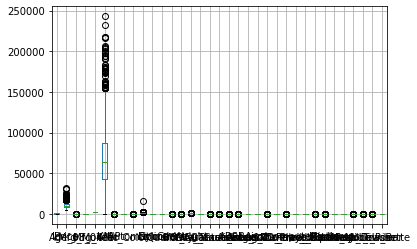

In [7]:
df.boxplot(figsize=(80,10))
plt.show()

### Heatmap

<Axes: >

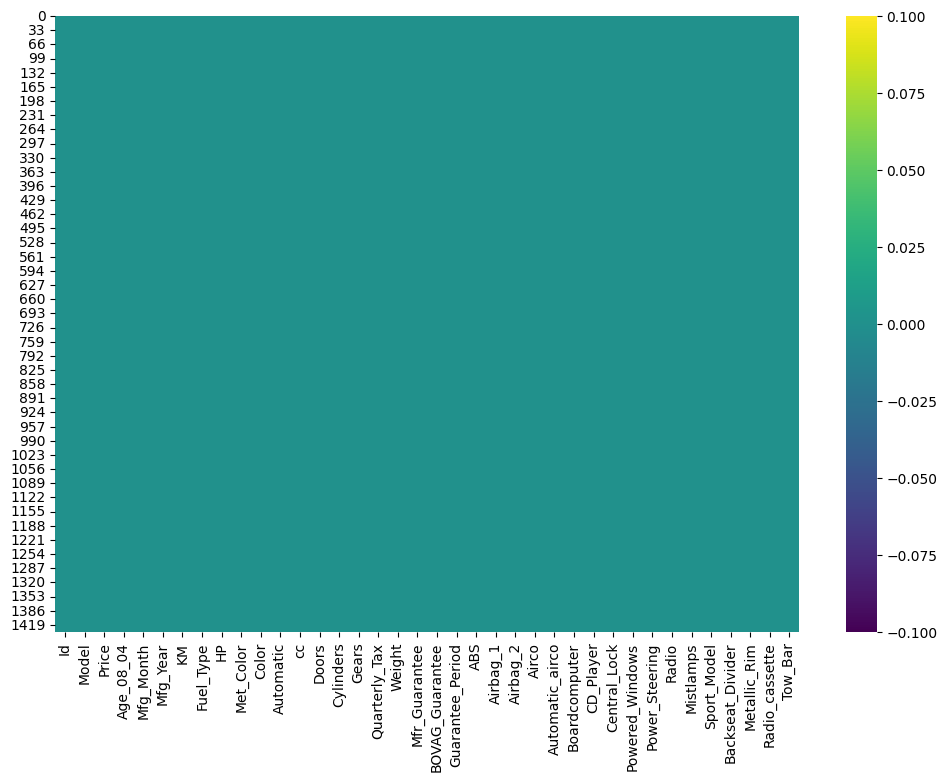

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [9]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)

In [10]:
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Renaming : For shortening the column names

In [11]:
df1=df1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [12]:
df1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Duplicate Values
- Finding duplicate values in dataset

In [13]:
df1[df1.duplicated()].shape

(1, 9)

In [14]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


- **Observation: There are duplicated values in the dataset**
- Hence, we dropped those values

### Dropping the duplicate values

In [15]:
df2=df1.drop_duplicates().reset_index(drop=True)

In [16]:
df2.shape

(1435, 9)

In [17]:
df2.head(115)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
112,24950,8,13253,116,2000,5,5,234,1320
113,22950,7,10000,116,2000,5,5,234,1270


In [18]:
df2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Histograms & Probability Plot : Distribution of Continuous Features 

In [19]:
import pylab
from scipy import stats
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    df2[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

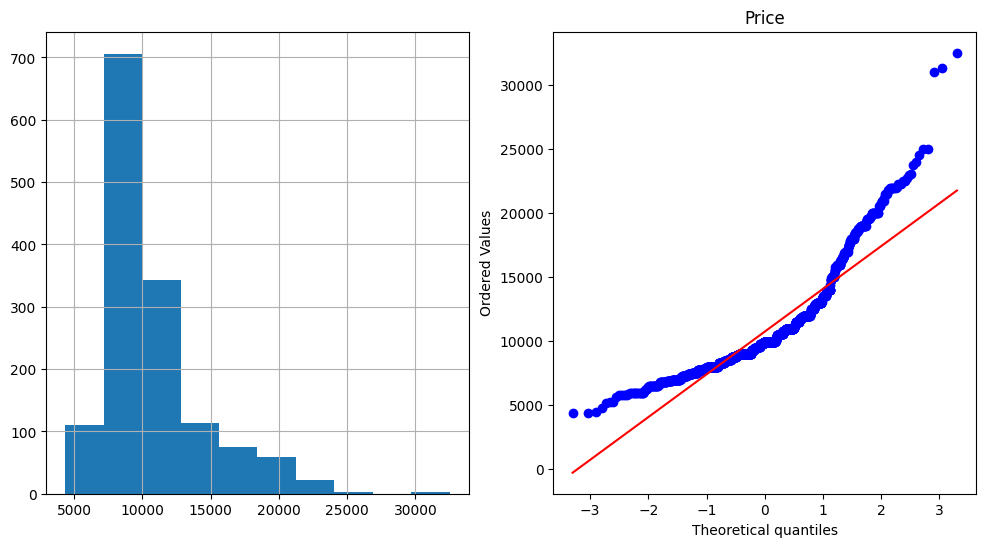

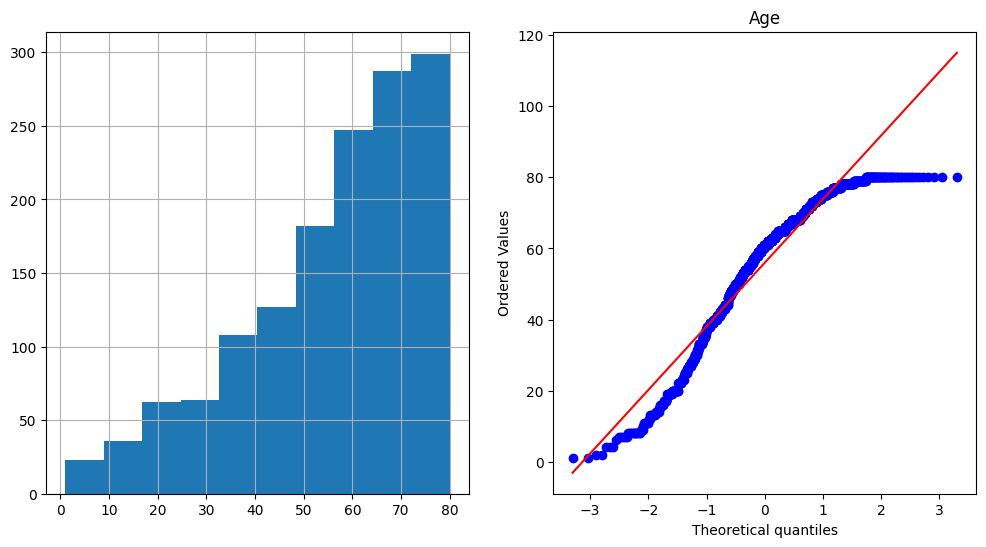

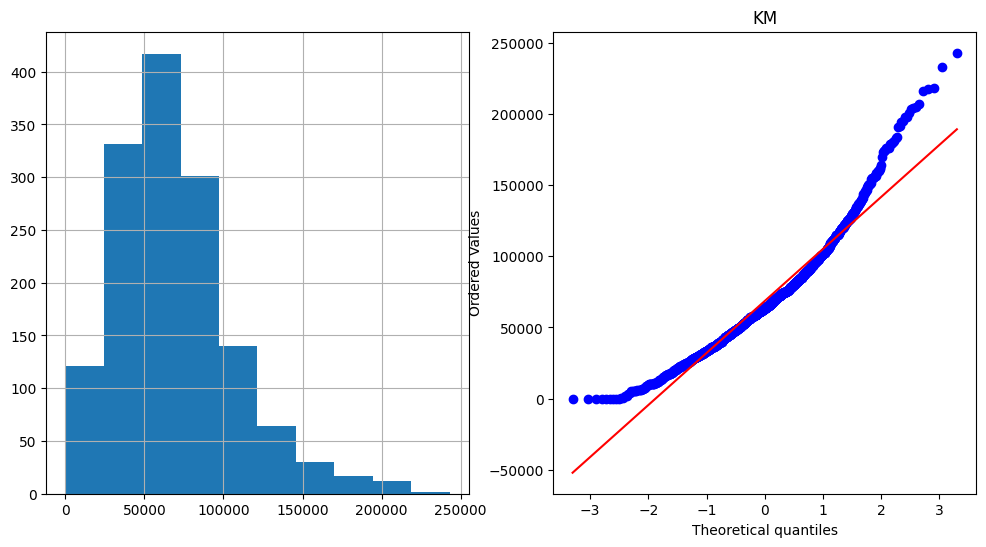

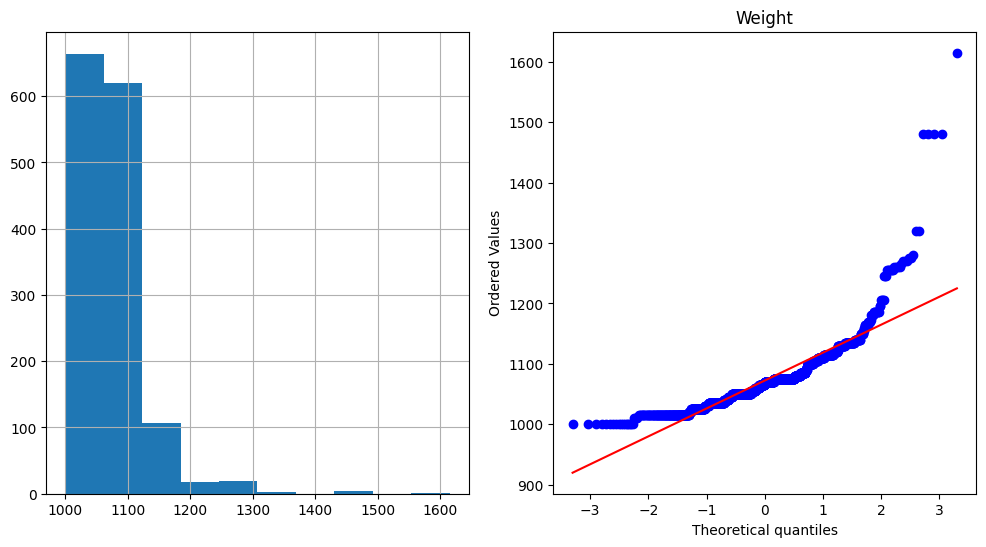

In [20]:
plot_data(df2,'Price')
plt.title('Price')
plot_data(df2,'Age')
plt.title('Age')
plot_data(df2,'KM')
plt.title('KM')
plot_data(df2,'Weight')
plt.title('Weight')

## Correlation Analysis

In [21]:
cor=df2.corr()
cor

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


## Visualization
### Pairplot : Correlation

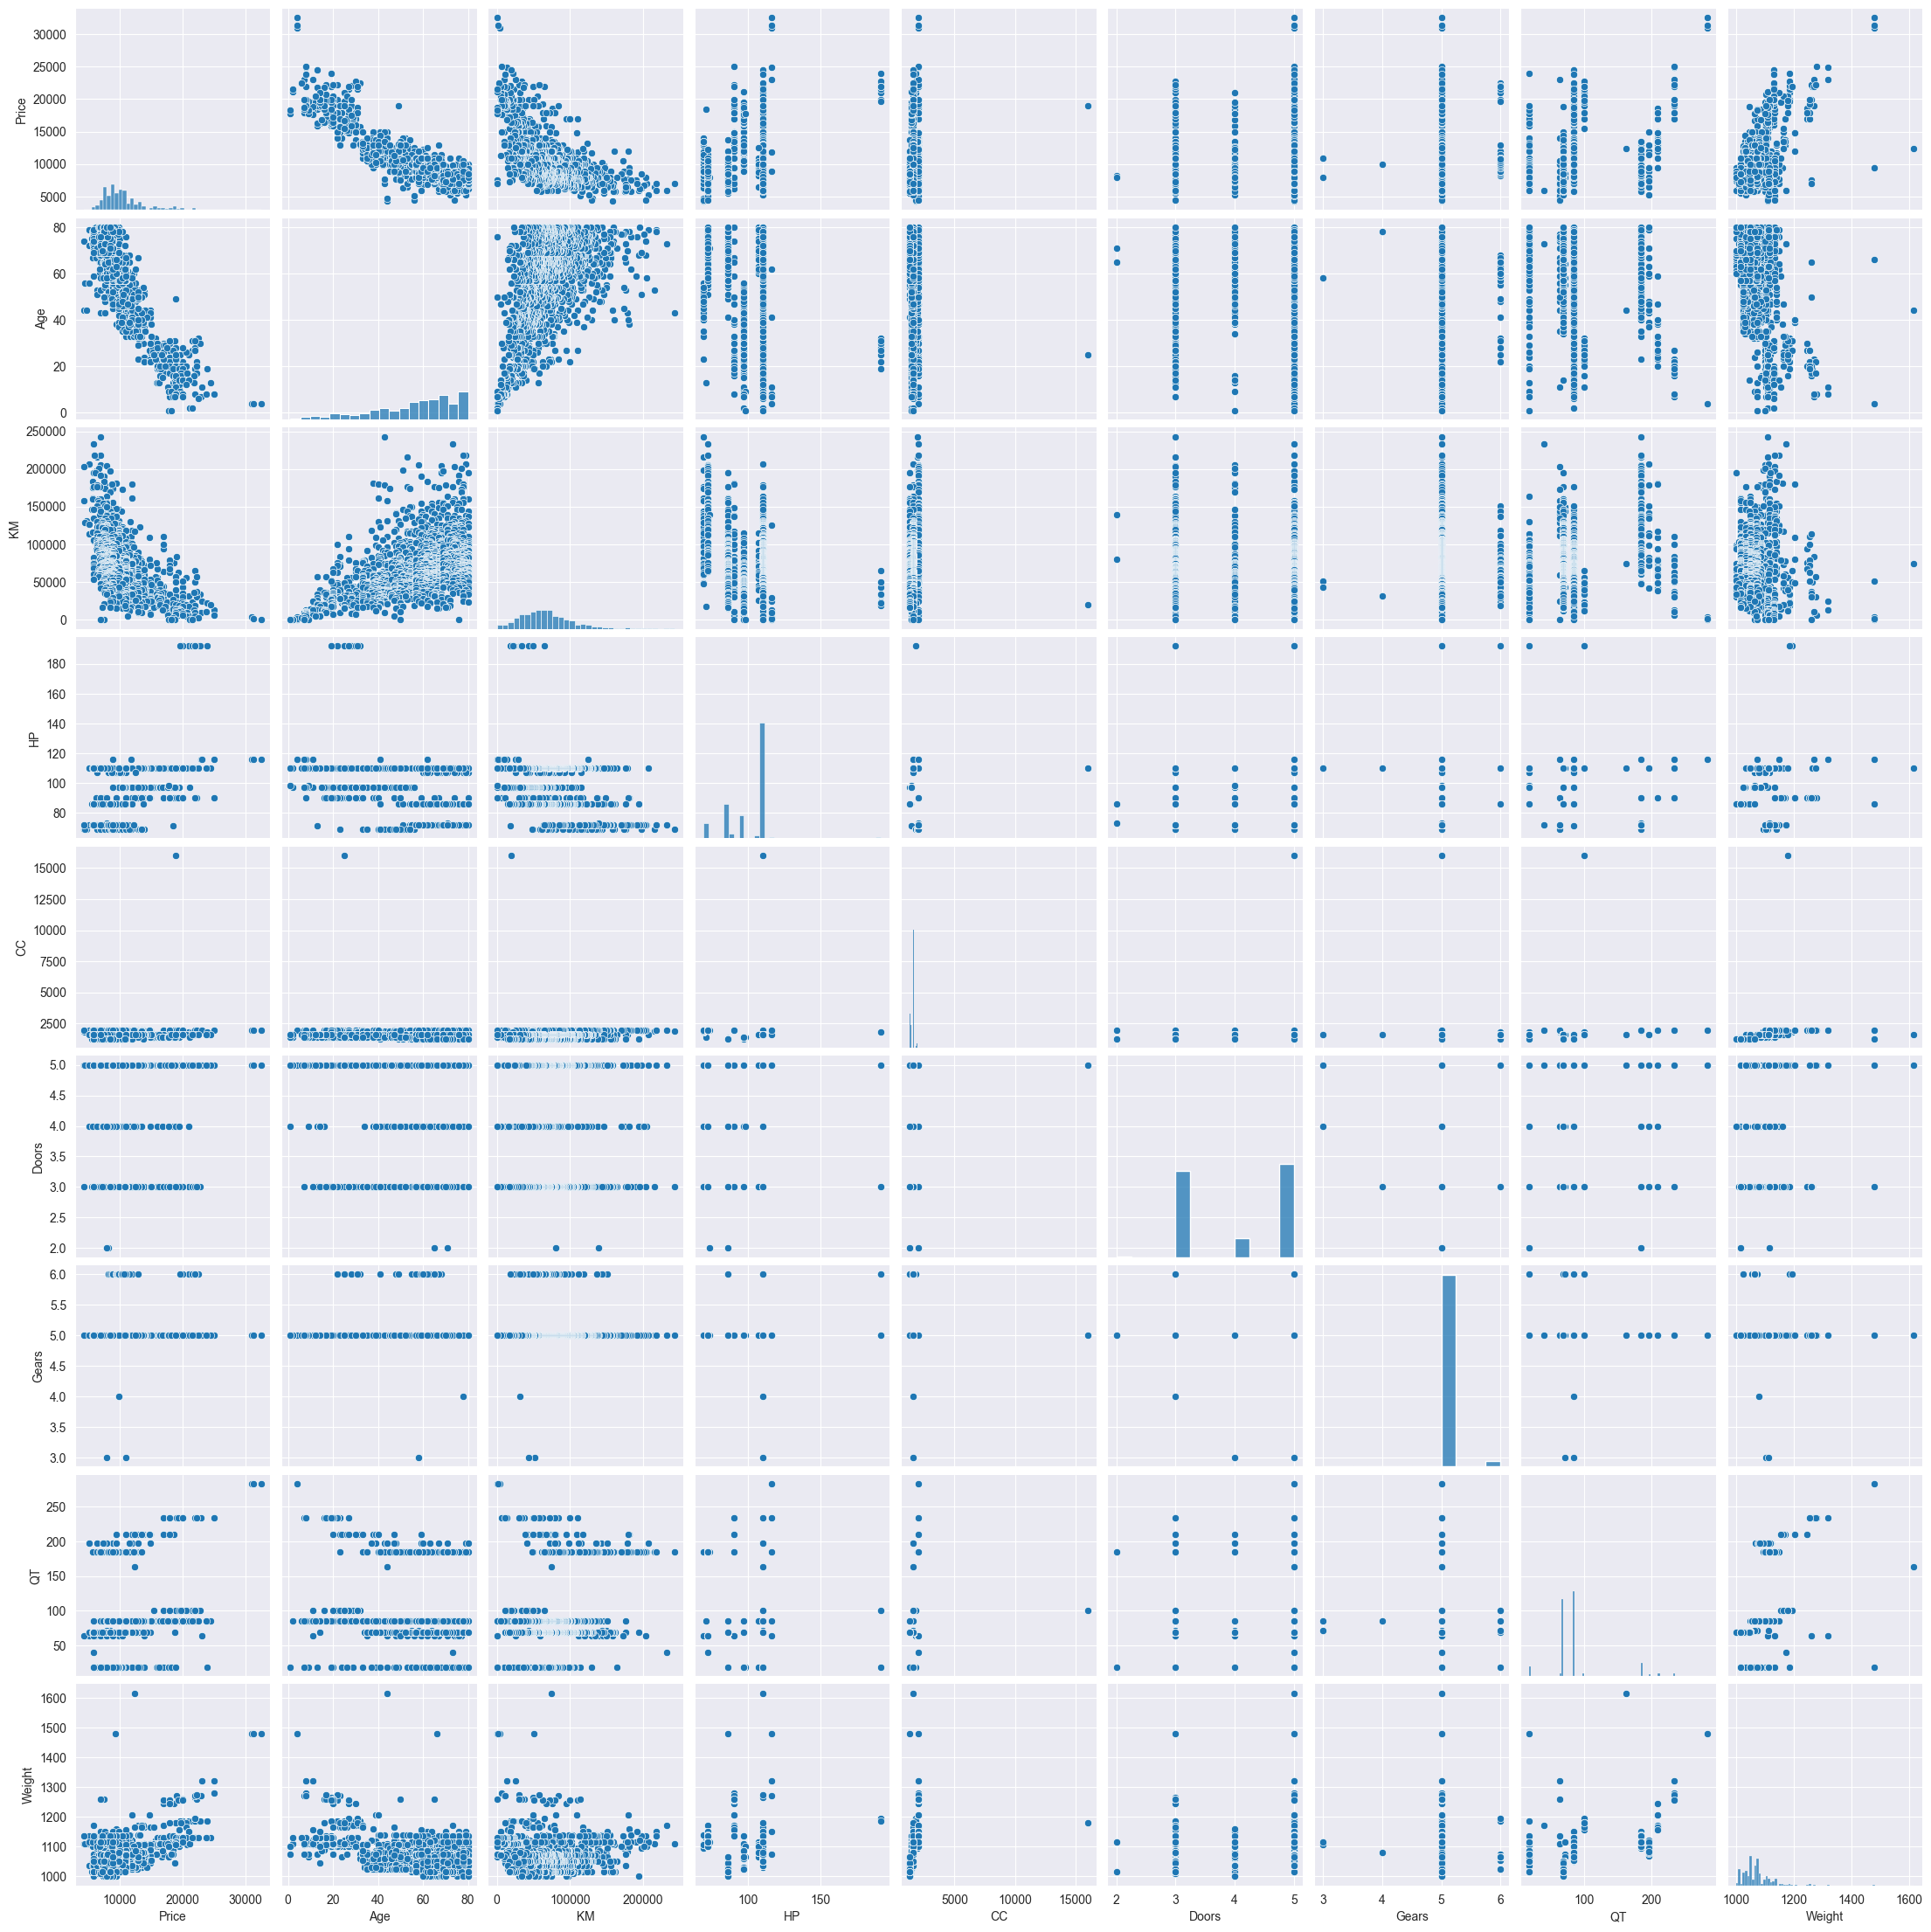

In [22]:
sns.set_style(style='darkgrid')
sns.pairplot(df2)
plt.show()

## Building Model : Multi Linear Resgression

In [23]:
import statsmodels.formula.api as sfa

In [24]:
model=sfa.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        12:23:38   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Regression Model

In [26]:
ml_c=sfa.ols('Price~CC',data=df2).fit()

In [27]:
print(ml_c.tvalues,'\n',ml_c.pvalues)

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [28]:
ml_d=sfa.ols('Price~Doors',data=df2).fit()

In [29]:
print(ml_d.tvalues,'\n',ml_d.pvalues)

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [30]:
ml_cd=sfa.ols('Price~CC+Doors',data=df2).fit()

In [31]:
print(ml_cd.tvalues,'\n',ml_cd.pvalues)

Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


## Collinearity Problem Check
### Checking for Multicollinearity using VIF (Variance Inflation Factor) 
- A table showing the VIF scores for each independent variable, including a constant term. 
- VIF values greater than 5 or 10 suggest a high degree of multicollinearity between that variable and the other independent variables, and may indicate that the variable should be removed from the model.

### Calculate VIF = 1/(1-Rsquare) for all independent variables


In [32]:
rsq_age=sfa.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=sfa.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=sfa.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=sfa.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=sfa.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=sfa.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df2).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=sfa.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df2).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=sfa.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df2).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


## Residual Analysis
Great, now that we have checked for collinearity, we can proceed to `Residual Analysis`.

- Residuals are the differences between the actual values of the target variable and the predicted values. 
- Residual analysis is important because it helps us to check if the assumptions of linear regression are met.

### To check if the assumptions of linear regression are met, we will do the following:

1. Check the normality of residuals using a histogram and a Q-Q plot.
2. Check the homoscedasticity of residuals by plotting the residuals against the predicted values.
3. Check for outliers using a boxplot.

- ## Normality of Residuals 
### None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

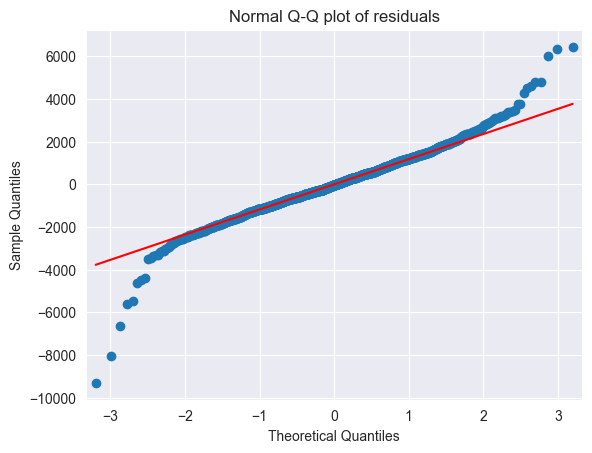

In [33]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

- ## Test for Homoscedasticity or Heteroscedasticity 
### Plotting model's Standardized Fitted values vs Standardized Residual values)

In [34]:
def get_standarized_values(vals):
    return (vals-vals.mean())/vals.std()

- ## Outliers Detection : Boxplot
1. To check for outliers in the data, we can use boxplots. 
2. Boxplots show the distribution of the data, including the median, the quartiles, and the range of the data. Points that are outside the range of the boxplot are considered outliers.

<Axes: xlabel='Price'>

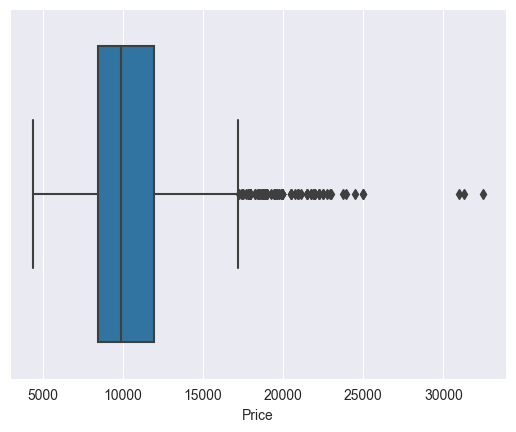

In [35]:
import seaborn as sns

sns.boxplot(x=df2['Price'])

<Axes: xlabel='Age'>

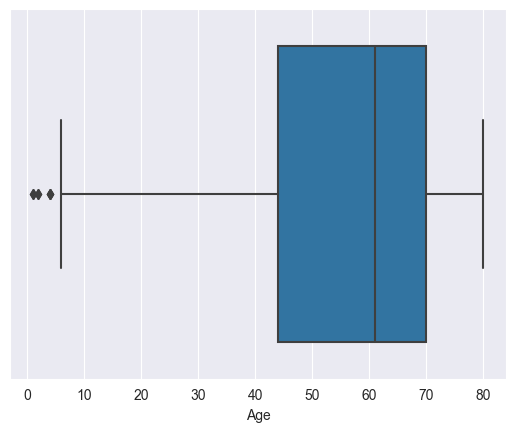

In [36]:
sns.boxplot(x=df2['Age'])

<Axes: xlabel='KM'>

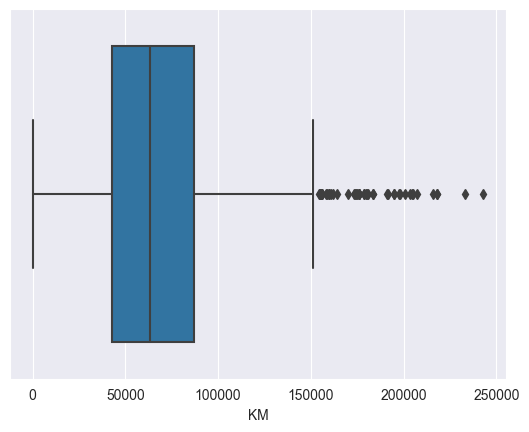

In [37]:
sns.boxplot(x=df2['KM'])

<Axes: xlabel='HP'>

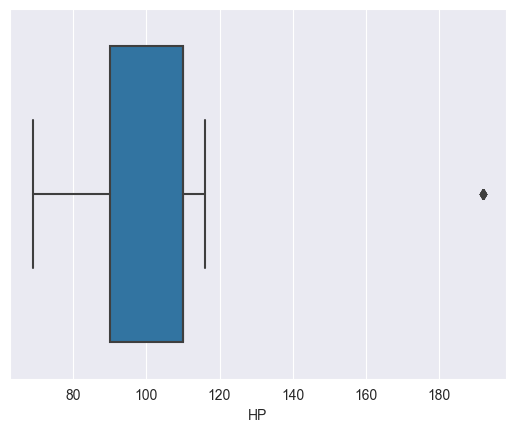

In [38]:
sns.boxplot(x=df2['HP'])

<Axes: xlabel='CC'>

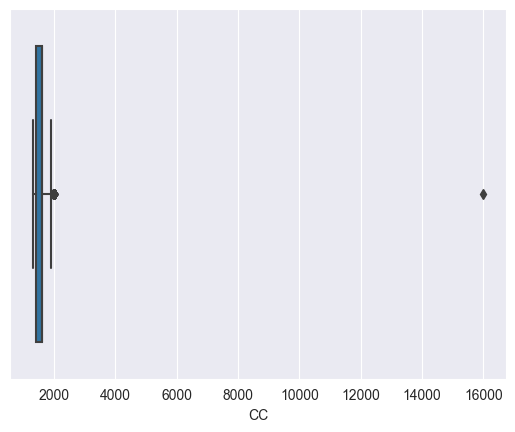

In [39]:
sns.boxplot(x=df2['CC'])

<Axes: xlabel='Doors'>

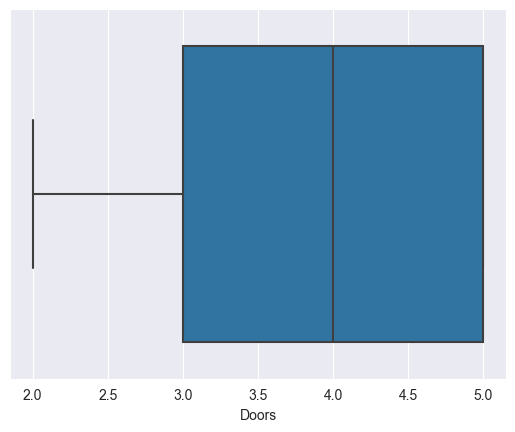

In [40]:
sns.boxplot(x=df2['Doors'])

<Axes: xlabel='QT'>

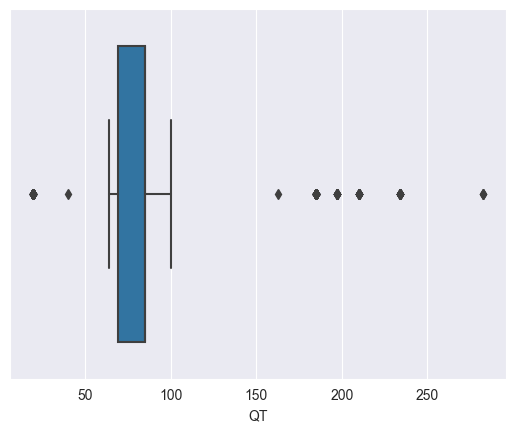

In [41]:
sns.boxplot(x=df2['QT'])

<Axes: xlabel='Weight'>

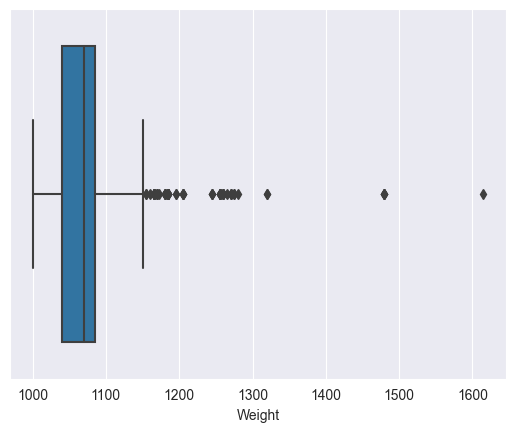

In [42]:
sns.boxplot(x=df2['Weight'])

## Residual Plot

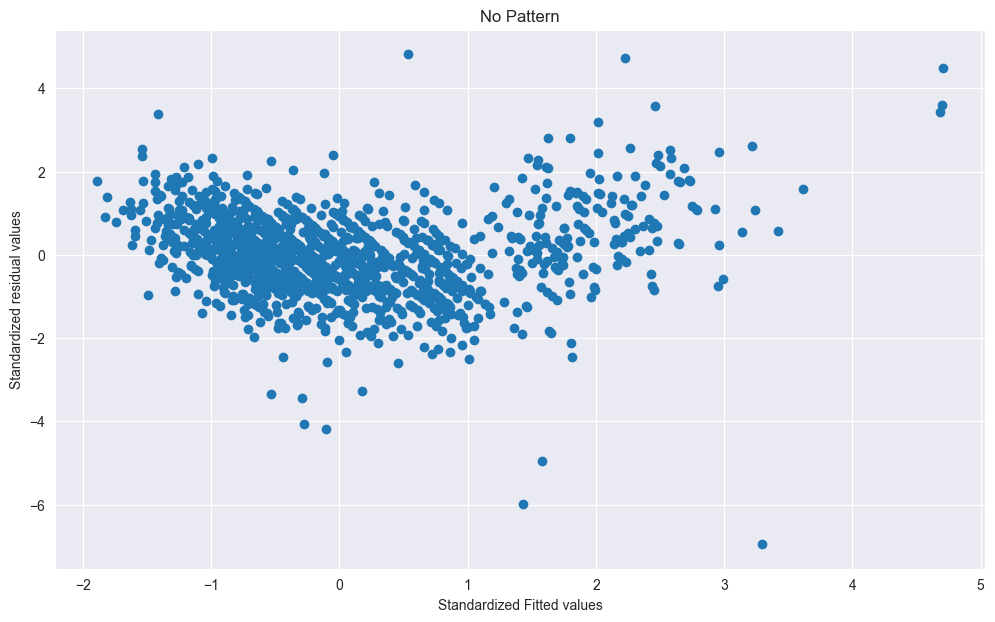

In [43]:
plt.figure(figsize=(12,7))
plt.scatter(get_standarized_values(model.fittedvalues),
           get_standarized_values(model.resid))
plt.title('No Pattern')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residuals vs Regressors
- Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

### Age

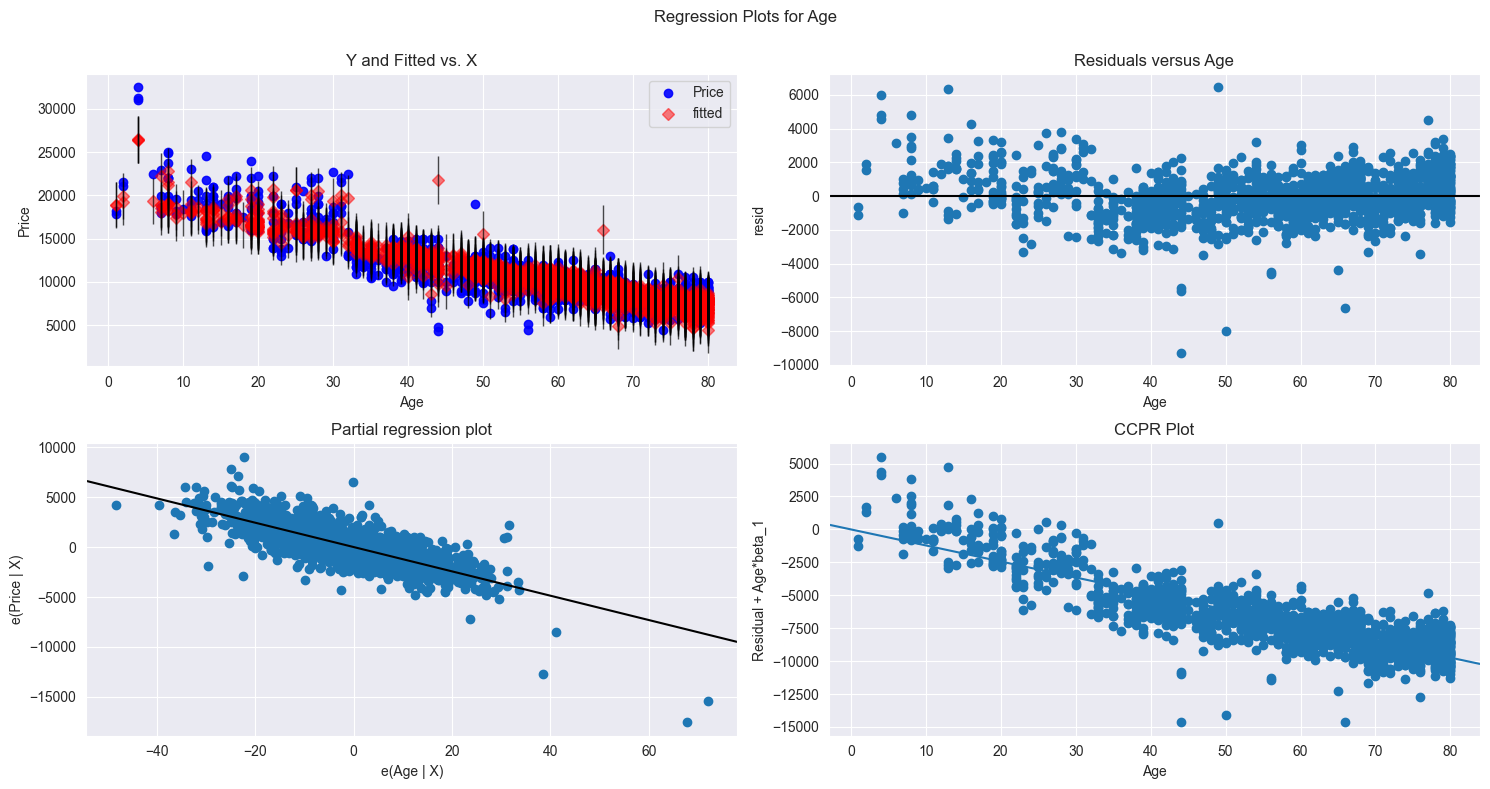

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

### KM

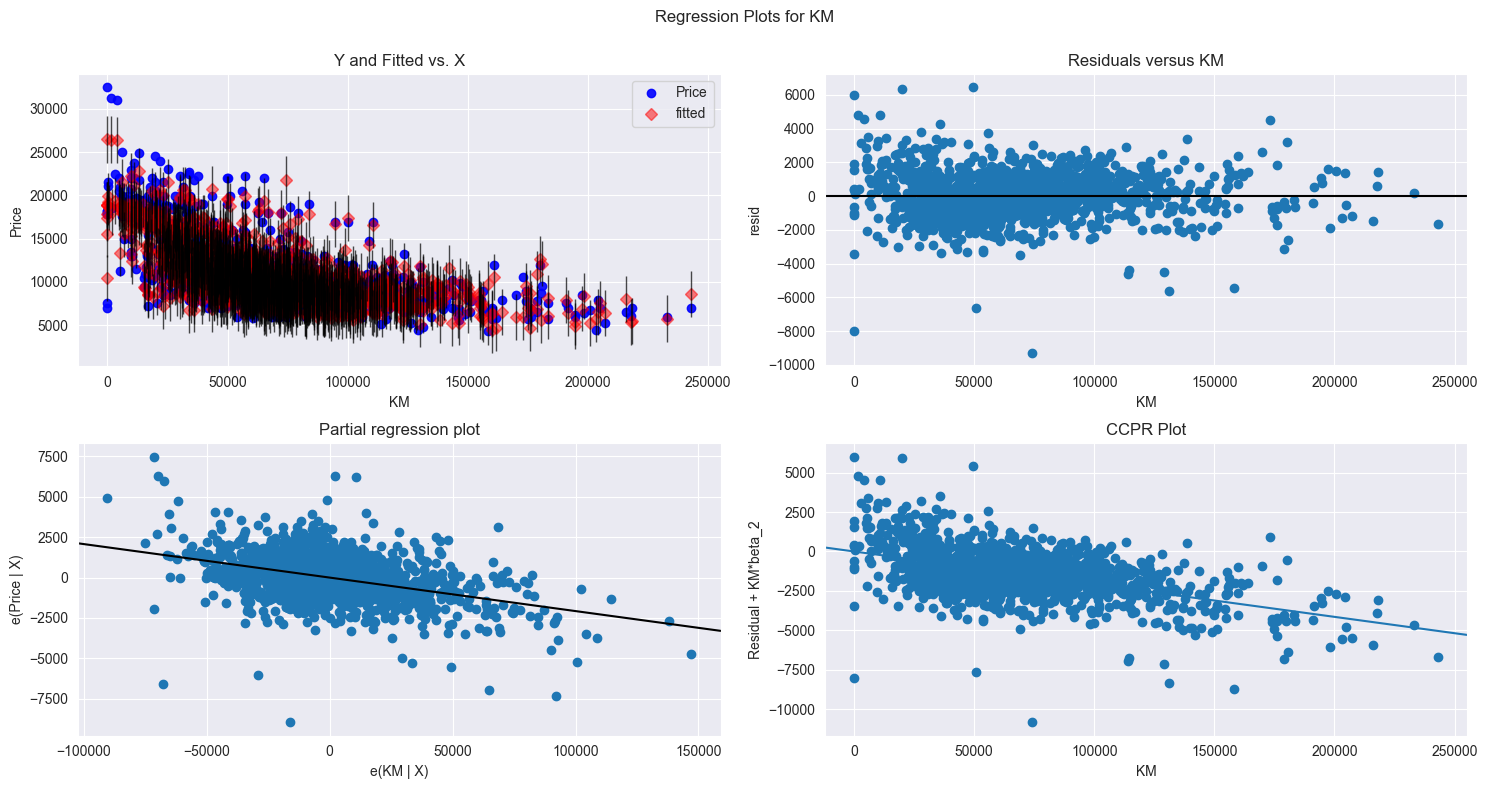

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

### HP

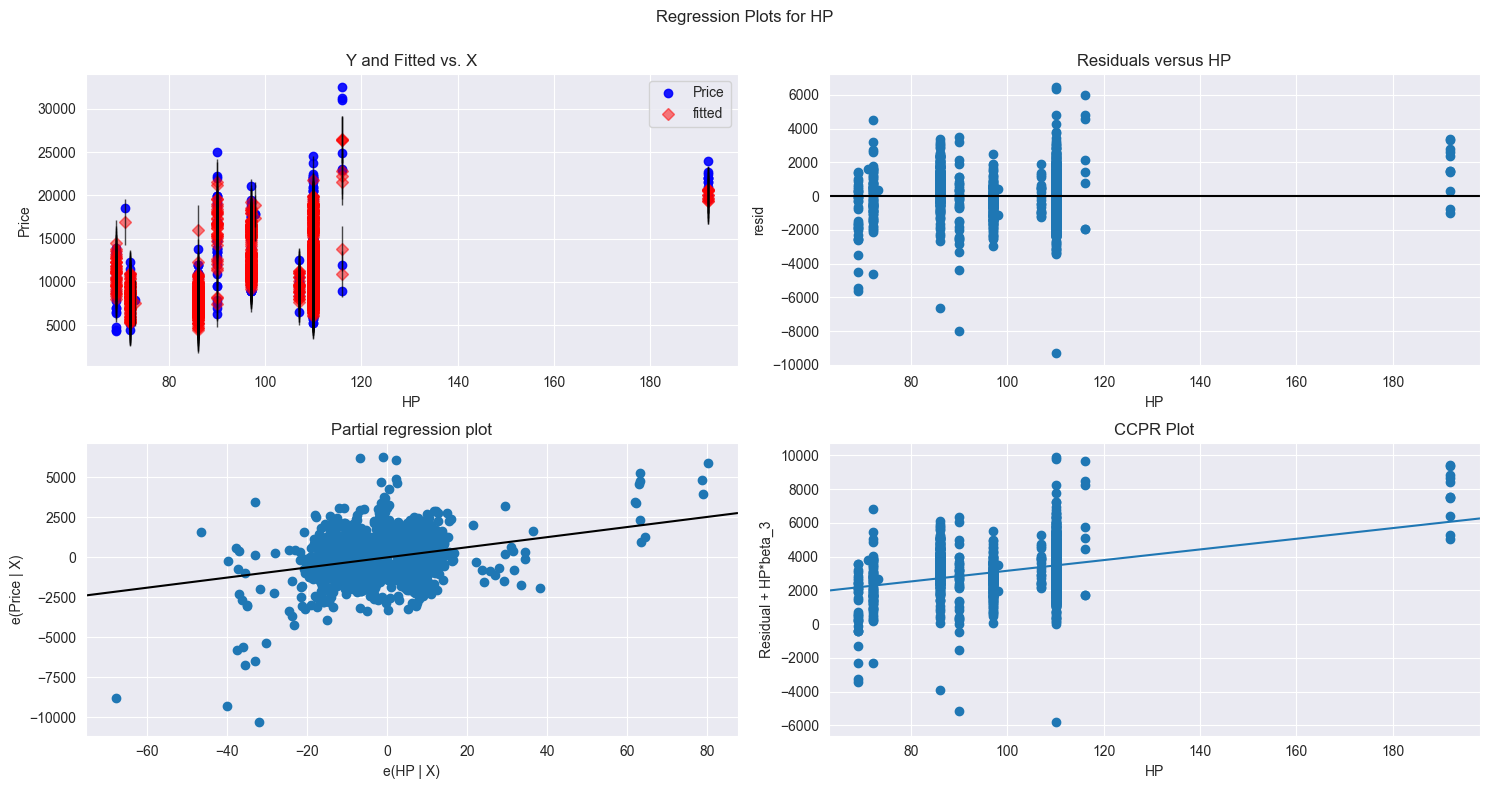

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

### CC

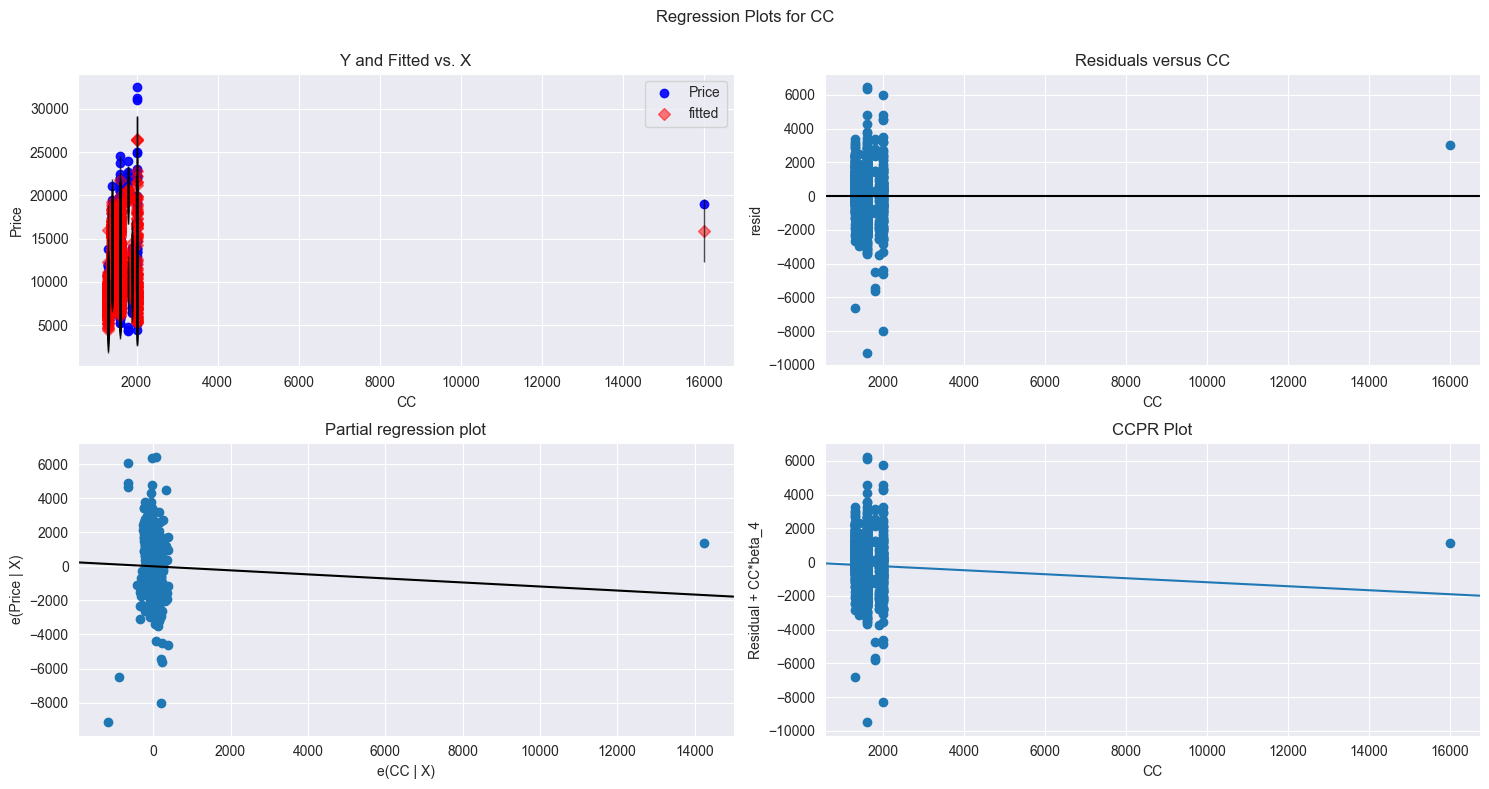

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

### Doors

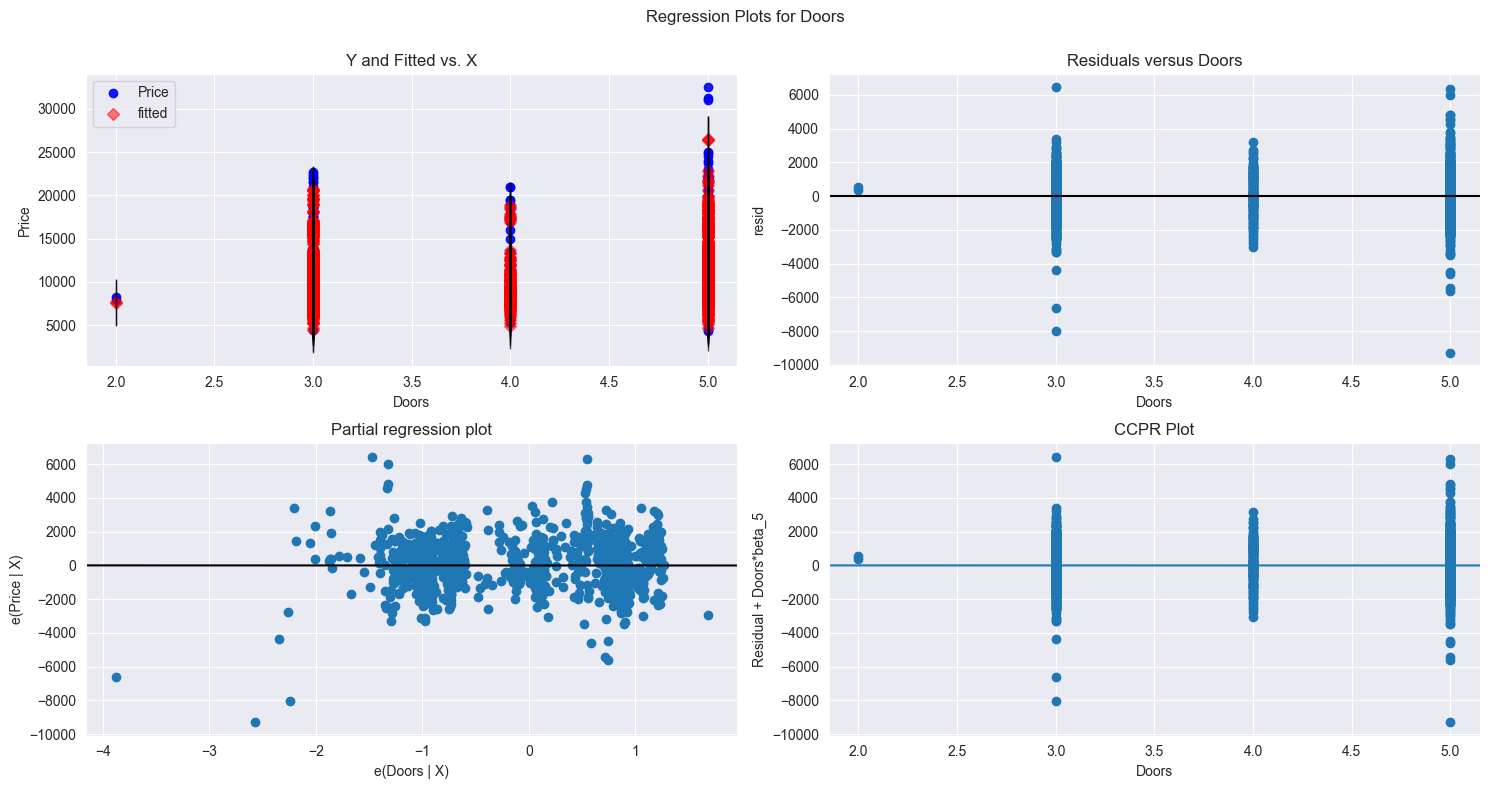

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

### Weight

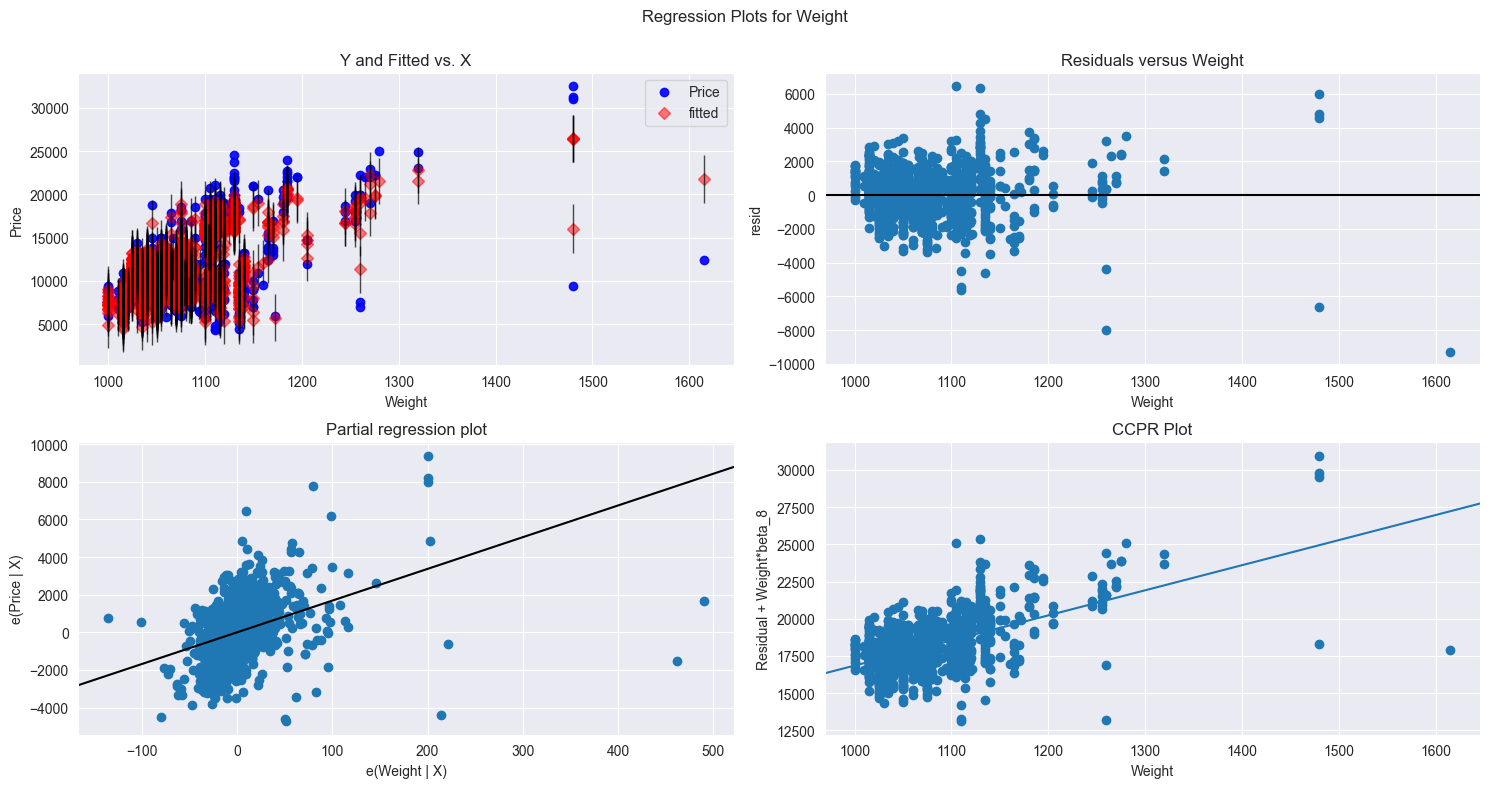

In [49]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

### QT

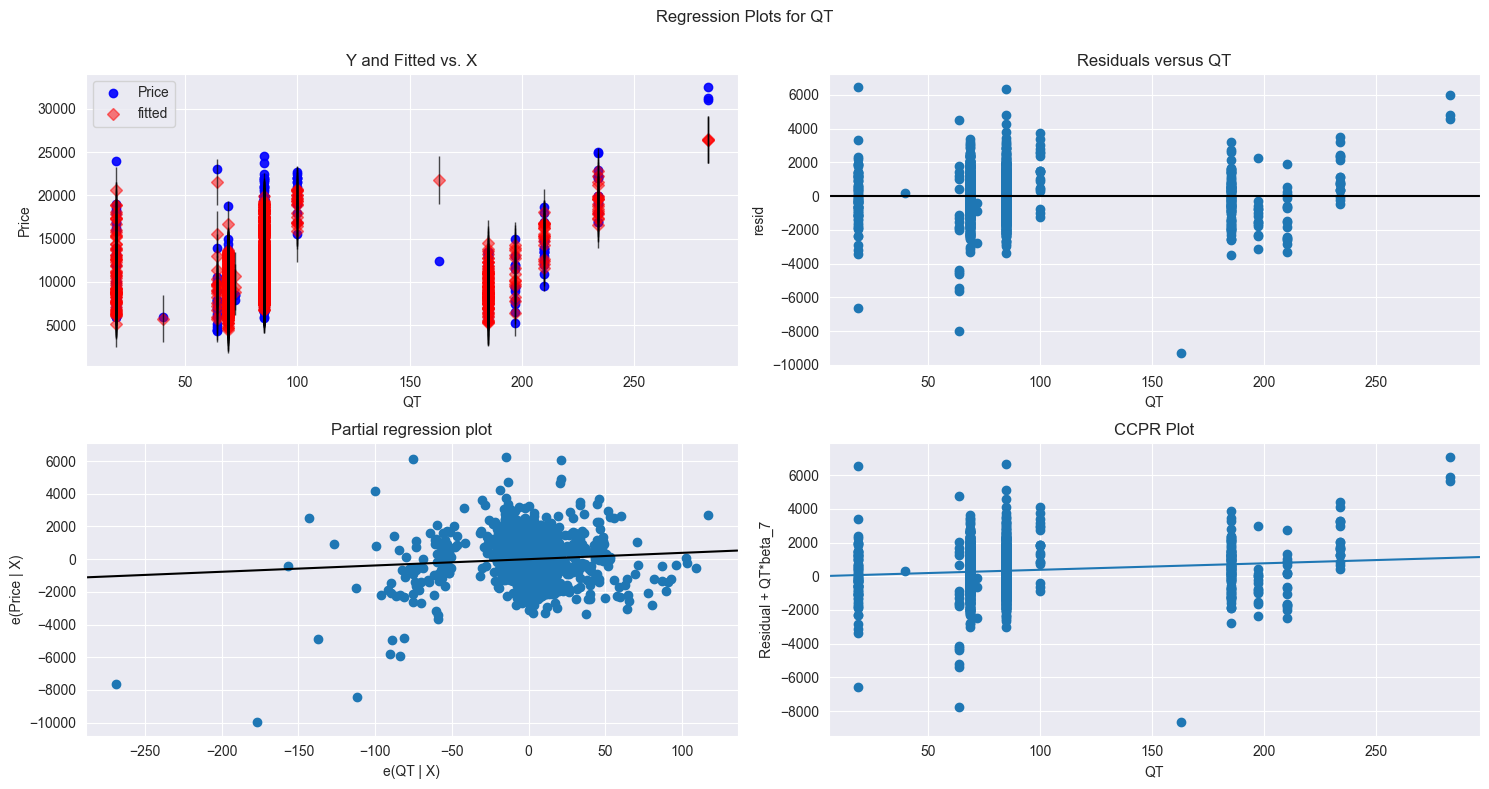

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)

In [51]:
from statsmodels.graphics.regressionplots import influence_plot

In [52]:
model_influence=model.get_influence()
(a,_)=model_influence.cooks_distance

### 1. Influence Plot

- The plot will show the standardized residuals versus leverage values, with the size of the markers proportional to the Cook's distance values. 
- It can be used to detect influential points that have a large impact on the model's fit.

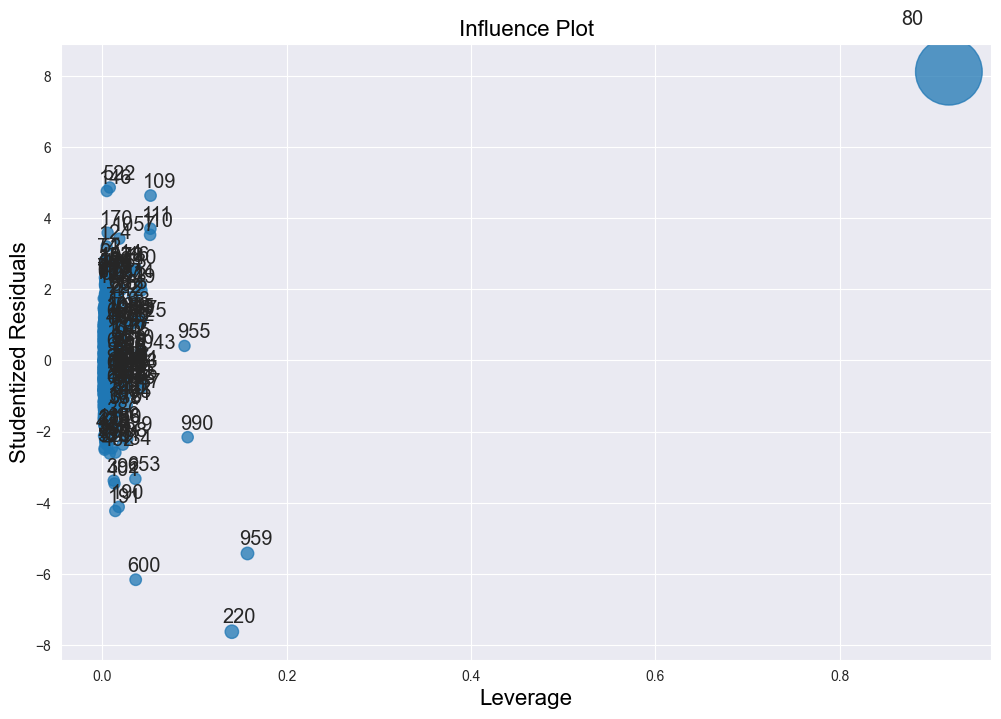

In [53]:
#Create the influence plot
fig, ax = plt.subplots(figsize=(12,8))
influence_plot(model, ax=ax)
plt.show()

### 2. Cook's Distance

- Cook's distance is a measure used in Regression Analysis to identify influential data points that can have a large effect on the fitted values of the dependent variable. 
- Cook's distance is based on the difference between the predicted values of the response variable using all of the data and the predicted values of the response variable if the influential data point is deleted from the data. 
- Data points with a Cook's distance greater than 1 are often considered influential, and should be examined more closely to determine whether they are genuine outliers or just extreme values within the data.

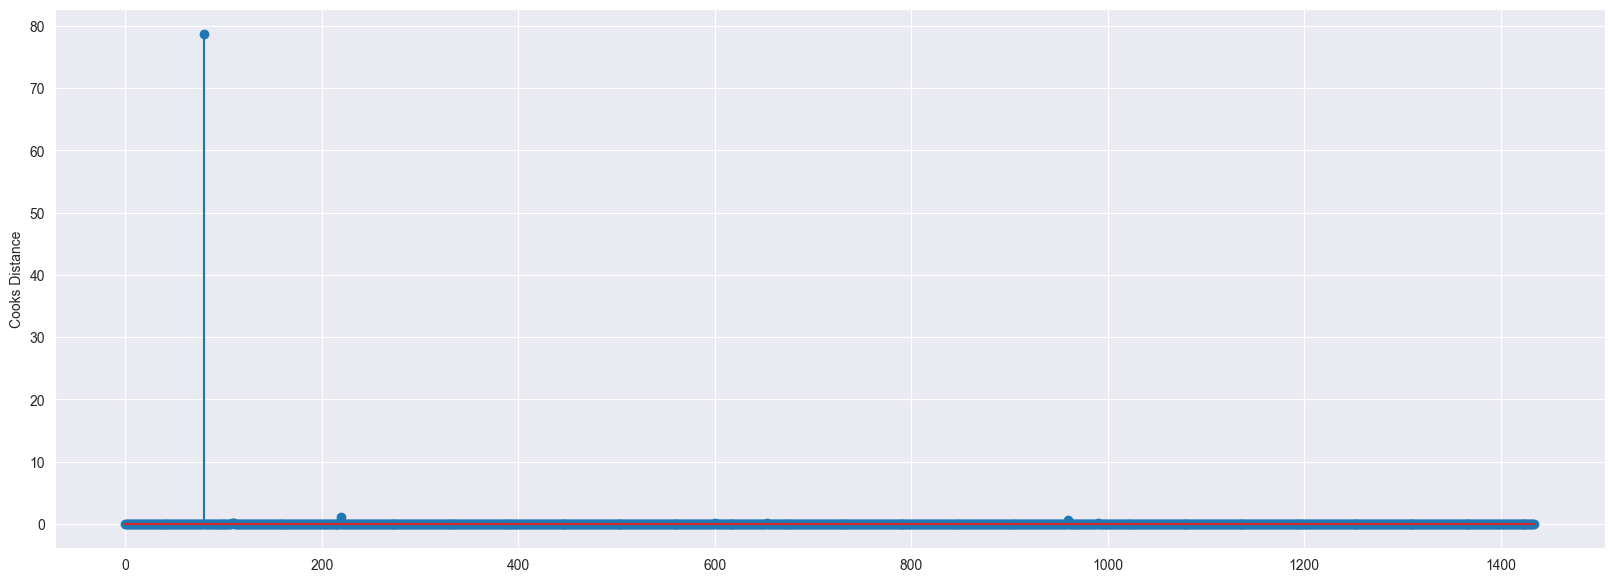

In [54]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(a,3))
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
np.argmax(a),np.max(a)

(80, 78.72950582259499)

## Improving the Model
- ### Let's improve the model by deleting the influence point and creating a new dataframe

In [56]:
df3=df2.drop(df2.index[80],axis=0).reset_index(drop=True)

In [57]:
df3.shape

(1434, 9)

### Building Model

In [58]:
model1=sfa.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df3).fit()

In [59]:
model_influence=model1.get_influence()
(b,_)=model_influence.cooks_distance

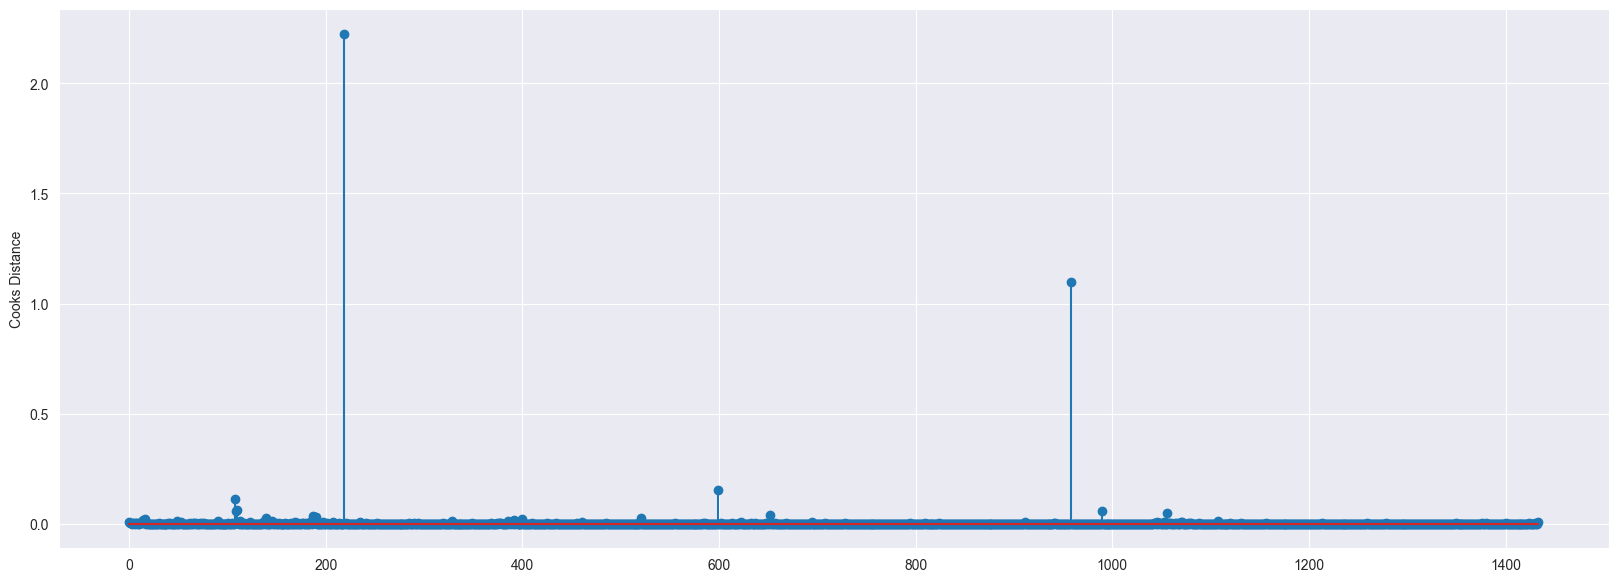

In [60]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df3)),np.round(b,3))
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
np.argmax(b),np.max(b)

(219, 2.2253513655271275)

### Improving the Model

In [62]:
df4=df3.drop(df3.index[219],axis=0).reset_index(drop=True)

In [63]:
df4.shape

(1433, 9)

### Building Model

In [64]:
model2=sfa.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df4).fit()

In [65]:
model_influence=model2.get_influence()
(c,_)=model_influence.cooks_distance

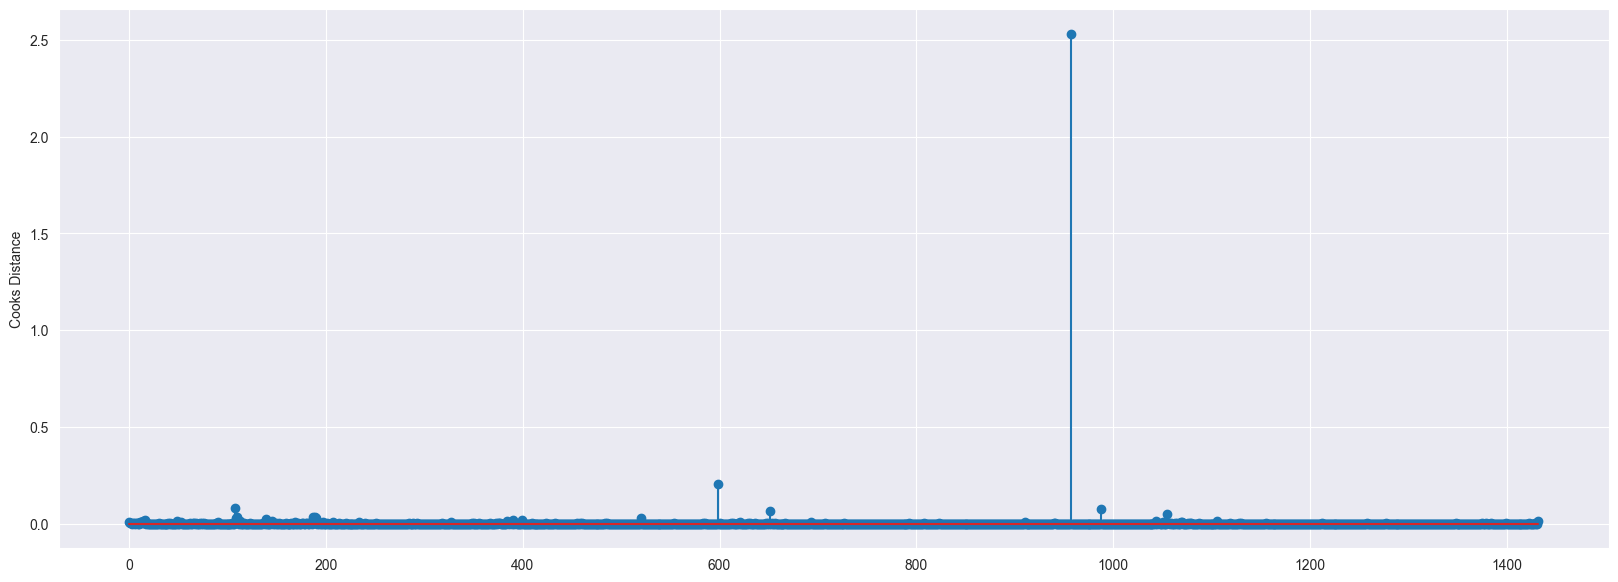

In [66]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c,3))
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
np.argmax(c),np.max(c)

(957, 2.530779623278251)

### Improving the Model

In [68]:
df5=df4.drop(df4.index[957],axis=0).reset_index(drop=True)

In [69]:
df5.shape

(1432, 9)

### Building Model

In [70]:
model3=sfa.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df5).fit()

In [71]:
model_influence=model3.get_influence()
(d,_)=model_influence.cooks_distance

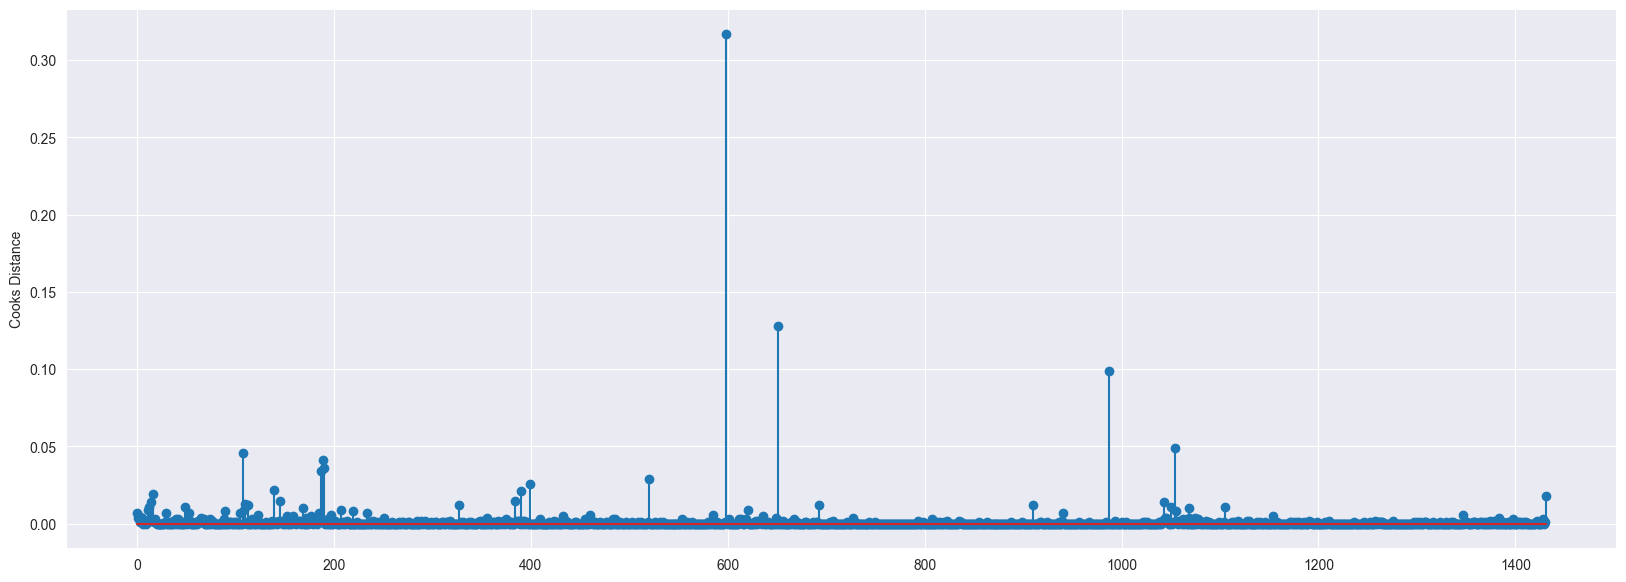

In [72]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df5)),np.round(d,3))
plt.ylabel('Cooks Distance')
plt.show()

In [73]:
np.argmax(d),np.max(d)

(598, 0.3168903540146383)

### Since the value is <1 , we can stop the diagnostic process and finalize the model

### Improving the Model

In [74]:
df6=df5.drop(df5.index[598],axis=0).reset_index(drop=True)

In [75]:
model4=sfa.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df6).fit()

In [76]:
model4.rsquared

0.8882395145171204

### Predicting New Values

In [77]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [78]:
model4.predict(new_data)

0    14341.570181
dtype: float64

In [79]:
pred_y=model4.predict(df6)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64